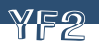

In [3]:
from IPython.display import Image
#from PIL import Image, ImageEnhance, ImageFilter
import PIL
from os import path
import os.path
import requests
import hashlib
import pytesseract  
import cv2
from skimage import data, io, filters
import re

from PIL import ImageDraw
import sys
sys.setrecursionlimit(4000)

CAPTCHA_FOLDER = 'tempr_captcha'
CAPTCHA_URL = 'https://tempr.email/application/api/secureCaptcha.php?sid=gdq6vb9b1q3ufg85hvudn3koh7&small=1'
CAPTCHA_IMAGE = 'captcha.png'

def download_image(url):
    img_data = requests.get(url).content
    img_md5 = hashlib.md5(img_data).hexdigest()
    img_path = os.path.join(CAPTCHA_FOLDER, img_md5 + '.png')
    with open(img_path, 'wb') as handler:
        handler.write(img_data)
    return img_path

def download_captcha(n):          
    for i in range(n):
        if i % 100 == 0:
            print('[' + str(i) + ']')
        download_image(CAPTCHA_URL)

def solve_captcha():
    img_path = download_image(CAPTCHA_URL)
    

    
# download_image    

# img = cv2.imread(img_path)
# print(type(img_data))
# print(type(img))
# text = pytesseract.image_to_string(Image.open('image'))
# print(text)


Image(filename='captcha.png')

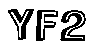

In [4]:
def image_to_bw(image_path):
    img = PIL.Image.open(image_path)
    pixels = img.load()
    for i in range(100):
        for j in range(50):
            if j < 24 and i < 99:
                pixels[i, j] = (0, 0, 0) if pixels[i, j][2] > 115 else (255, 255, 255)
            else:
                pixels[i, j] = (0, 0, 0) if pixels[i, j][2] < 255 else (255, 255, 255)
    bw_img_path = re.sub(r"\.png$", "_bw.png", image_path)
    img.save(bw_img_path)
    return bw_img_path

bw_image_path = image_to_bw(CAPTCHA_IMAGE)

Image(filename=bw_image_path)

guess = 


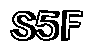

In [5]:
captcha_image = download_image(CAPTCHA_URL)
bw_captcha_image = image_to_bw(captcha_image)

text = pytesseract.image_to_string(PIL.Image.open(bw_captcha_image))
print("guess =", text)
Image(filename=bw_captcha_image)

tempr_captcha/96b8fe6146be0c28ce6112ef242d0b95_bw_outlined.png
VS



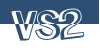

In [8]:
def rec_fill(x, y, pixels, area, rect=None):
    area.append([x, y])
    if rect is not None:
        rect['x1'] = min(rect['x1'], x)
        rect['y1'] = min(rect['y1'], y)
        rect['x2'] = max(rect['x2'], x)
        rect['y2'] = max(rect['y2'], y)
    if x - 1 >= 0 and pixels[x - 1, y] == (255, 255, 255) and [x - 1, y] not in area:
        rec_fill(x - 1, y, pixels, area, rect)
    if x + 1 < 100 and pixels[x + 1, y] == (255, 255, 255) and [x + 1, y] not in area:
        rec_fill(x + 1, y, pixels, area, rect)
    if y - 1 >= 0 and pixels[x, y - 1] == (255, 255, 255) and [x, y - 1] not in area:
        rec_fill(x, y - 1, pixels, area, rect)
    if y + 1 < 50 and pixels[x, y + 1] == (255, 255, 255) and [x, y + 1] not in area:
        rec_fill(x, y + 1, pixels, area, rect)

def fill_area(pixels, area, color):
    for cords in area:
        pixels[cords[0], cords[1]] = color

def fill_background(pixels):
    area = []
    recursive_traversal(0, 0, pixels, area)
    fill_area(pixels, area, (0, 0, 0))   

def fill_letters(image_path):
    img = PIL.Image.open(image_path)
    draw = ImageDraw.Draw(img)
    pixels = img.load()
    fill_background(pixels)
    characters = []
    
    for i in range(100):
        for j in range(50):
            if pixels[i, j] == (255, 255, 255):
                area = []
                rect = {
                    "x1": i,
                    "y1": j,
                    "x2": i,
                    "y2": j
                }
                recursive_traversal(i, j, pixels, area, rect)
                fill_area(pixels, area, (0, 255, 0))
                # draw.rectangle([(rect['x1'], rect['y1']), (rect['x2'], rect['y2'])], outline ="red") 
                #print(rect, len(area))
                rect['square'] = (rect['x2'] - rect['x1']) * (rect['y2'] - rect['y1'])
                rect['area'] = area
                characters.append(rect)
    
    characters.sort(key=lambda x: x['square'], reverse=True)
    for character in characters[:3]:
        draw.rectangle([(character['x1'], character['y1']), (character['x2'], character['y2'])], outline ="red")
    
    outlined_image_path = re.sub(r"\.png$", "_outlined.png", image_path)
    print(outlined_image_path)
    img.save(outlined_image_path)
    
    draw.rectangle([(0, 0), (100, 50)], fill='white', outline ='white')
    
    for character in characters[:3]:
        fill_area(pixels, character['area'], (0, 0, 0))  
    
    filled_image_path = re.sub(r"\.png$", "_filled.png", image_path)
    img.save(filled_image_path)
    return filled_image_path

def img_to_text(image_path):
    text = pytesseract.image_to_string(PIL.Image.open(image_path), config='-c tessedit_char_whitelist=123456789ABCDEFGHKLNPRSTUVXYZ')
    return text

captcha_image = download_image(CAPTCHA_URL)
bw_captcha_image = image_to_bw(captcha_image)

# text = pytesseract.image_to_string(PIL.Image.open(bw_captcha_image))
# print("guess =", text)
# Image(filename=bw_captcha_image)
    
img_path = fill_letters(bw_captcha_image)
text = img_to_text(img_path)
print(text)
# img_path = fill_letters('tempr_captcha/b6ea4d2f905b460ee0efc34d813c4b5b_bw.png')
Image(filename=captcha_image)

In [10]:
CAPTCHA_URL = 'https://tempr.email/application/api/secureCaptcha.php?sid=gdq6vb9b1q3ufg85hvudn3koh7&small=1'

def solve_captcha(captcha_url):
    captcha_image = download_image(CAPTCHA_URL)
    print(captcha_image)
    bw_captcha_image = image_to_bw(captcha_image)
    print(bw_captcha_image)
    filled_captcha_image = fill_letters(bw_captcha_image)
    print(filled_captcha_image)
    text = img_to_text(filled_captcha_image)
    return text

print(solve_captcha(CAPTCHA_URL))

tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9.png
tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9_bw.png
tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9_bw_outlined.png
tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9_bw_filled.png
LPX



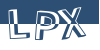

In [11]:
Image(filename='tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9.png')

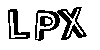

In [12]:
Image(filename='tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9_bw.png')

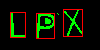

In [13]:
Image(filename='tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9_bw_outlined.png')

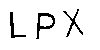

In [14]:
Image(filename='tempr_captcha/ebcdf6fcc3aa8932ae3f53ffcae4d0d9_bw_filled.png')